In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('C:\\Users\\pc\\OneDrive\\Desktop\\Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df['step'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [5]:
df.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.shape

(6362620, 11)

In [8]:
df['type'].unique

<bound method Series.unique of 0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 6362620, dtype: object>

In [9]:
type = df['type'].value_counts()

In [10]:
transaction=type.index

In [11]:
quantity=type.values

In [12]:
import plotly.express as px

In [13]:
df['type'] = df['type'].replace(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'CASH_IN', 'DEBIT'], [2, 4, 1, 3, 5])


In [14]:
type

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [15]:
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [16]:
df['isFraud']=df['isFraud'].map({0:'no fraud',1:'fraud'})

In [17]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,no fraud,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,no fraud,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,fraud,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,fraud,0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,no fraud,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,fraud,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,fraud,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,fraud,0
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,fraud,0


In [18]:
x=df[['type','amount','newbalanceOrig',]]

In [19]:
y=df.iloc[:,-1]

In [20]:
y

0          0
1          0
2          0
3          0
4          0
          ..
6362615    0
6362616    0
6362617    0
6362618    0
6362619    0
Name: isFlaggedFraud, Length: 6362620, dtype: int64

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
model=DecisionTreeClassifier()

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [25]:
model.score(xtest,ytest)

0.9999960708010223

In [26]:
y_pred = model.predict(xtest)
#Precision 
#Precision=TP/(TP+FP)
precision=precision_score(ytest, y_pred, pos_label=1)*100
print('\n Score Precision :\n',precision )
#Recall
# Recall = TP / (TP + FN)
recall=recall_score(ytest, y_pred, pos_label=1)*100
print("\n Recall Score :\n", recall)
#F1 Test
#F1=2(precision.recall/precision+recall)
fscore=f1_score(ytest, y_pred, pos_label=1)*100
print("\n F1 Score :\n", fscore)



 Score Precision :
 25.0

 Recall Score :
 33.33333333333333

 F1 Score :
 28.571428571428577


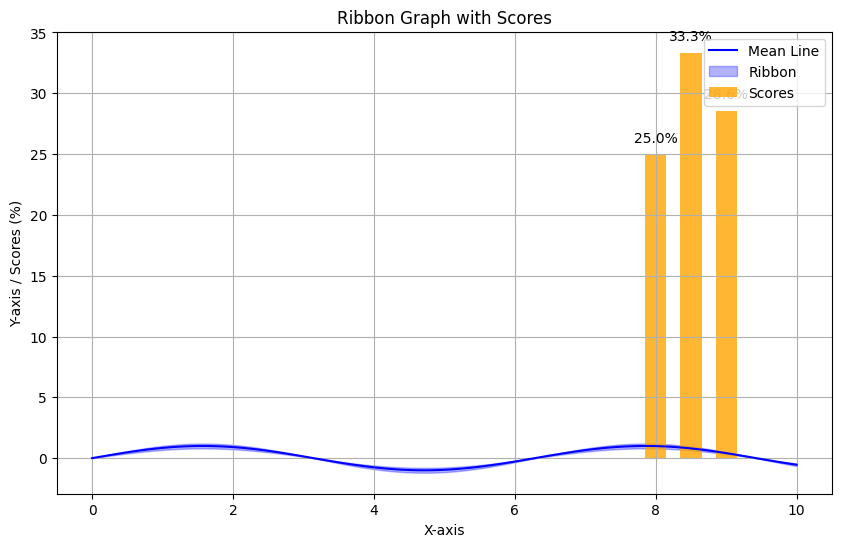

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Generate example data
x_values = np.linspace(0, 10, 100)
y_values = np.sin(x_values)
y_error = 0.2 * np.sin(x_values)

# Plot the ribbon graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Mean Line', color='blue')
plt.fill_between(x_values, y_values - y_error, y_values + y_error, color='blue', alpha=0.3, label='Ribbon')

# Add scores as a separate bar plot
scores = [precision, recall, fscore]
score_labels = ['Precision', 'Recall', 'F1 Score']
score_positions = [8, 8.5, 9]  # X-coordinates for the bars

plt.bar(score_positions, scores, width=0.3, color='orange', alpha=0.8, label='Scores')

# Add labels and legend
plt.title('Ribbon Graph with Scores')
plt.xlabel('X-axis')
plt.ylabel('Y-axis / Scores (%)')
plt.legend()
plt.grid(True)

# Add text annotations for the scores
for pos, score, label in zip(score_positions, scores, score_labels):
    plt.text(pos, score + 1, f'{score:.1f}%', ha='center', fontsize=10)

plt.show()


     step  type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
2       1     4    181.0  C1305486145          181.0             0.0   
3       1     1    181.0   C840083671          181.0             0.0   
251     1     4   2806.0  C1420196421         2806.0             0.0   
252     1     1   2806.0  C2101527076         2806.0             0.0   
680     1     4  20128.0   C137533655        20128.0             0.0   

        nameDest  oldbalanceDest  newbalanceDest isFraud  isFlaggedFraud  
2     C553264065             0.0             0.0   fraud               0  
3      C38997010         21182.0             0.0   fraud               0  
251   C972765878             0.0             0.0   fraud               0  
252  C1007251739         26202.0             0.0   fraud               0  
680  C1848415041             0.0             0.0   fraud               0  


C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


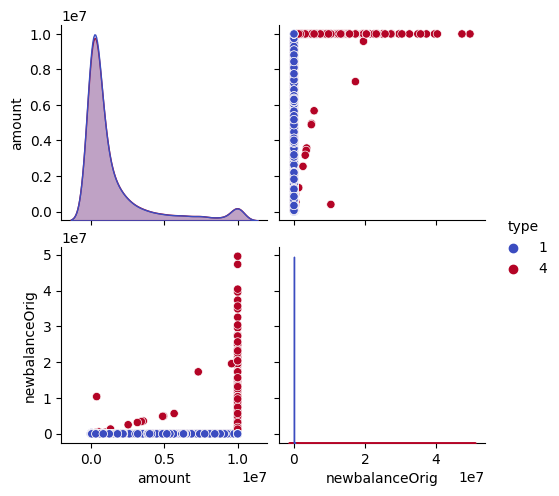

In [28]:
fraud_transactions = df[df['isFraud'] == 'fraud']
print(fraud_transactions.head())

# Analyze features specific to fraudulent transactions
sns.pairplot(fraud_transactions[['type', 'amount', 'newbalanceOrig']], hue='type', palette='coolwarm')
plt.show()


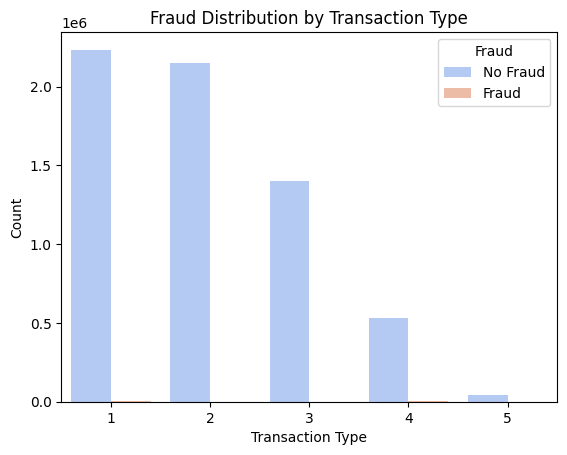

In [29]:
sns.countplot(data=df, x='type', hue='isFraud', palette='coolwarm')
plt.title('Fraud Distribution by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['No Fraud', 'Fraud'])
plt.show()


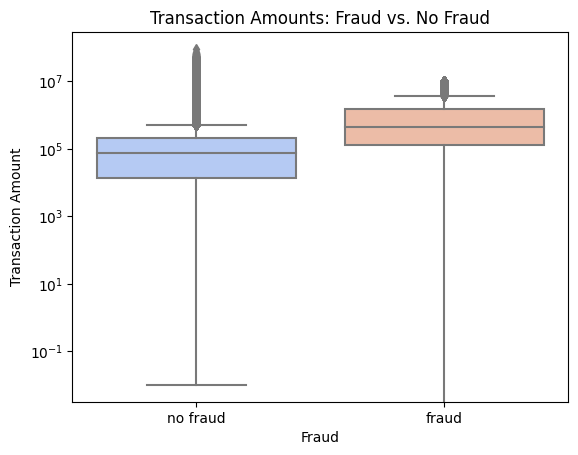

In [30]:
sns.boxplot(data=df, x='isFraud', y='amount', palette='coolwarm')
plt.title('Transaction Amounts: Fraud vs. No Fraud')
plt.xlabel('Fraud')
plt.ylabel('Transaction Amount')
plt.yscale('log')  # Log scale for better visualization of large transaction amounts
plt.show()


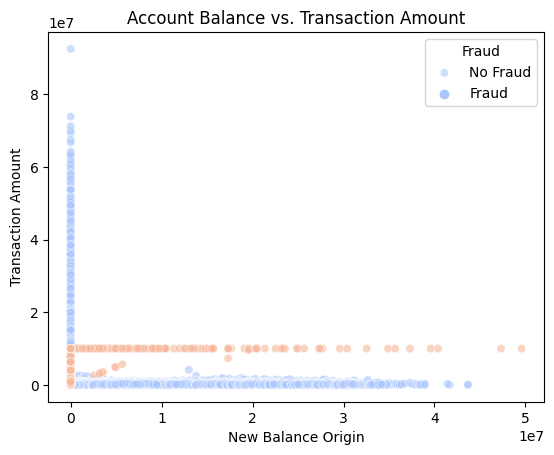

In [31]:
sns.scatterplot(data=df, x='newbalanceOrig', y='amount', hue='isFraud', palette='coolwarm', alpha=0.6)
plt.title('Account Balance vs. Transaction Amount')
plt.xlabel('New Balance Origin')
plt.ylabel('Transaction Amount')
plt.legend(title='Fraud', labels=['No Fraud', 'Fraud'])
plt.show()


Non-numeric columns: Index(['nameOrig', 'nameDest', 'isFraud'], dtype='object')


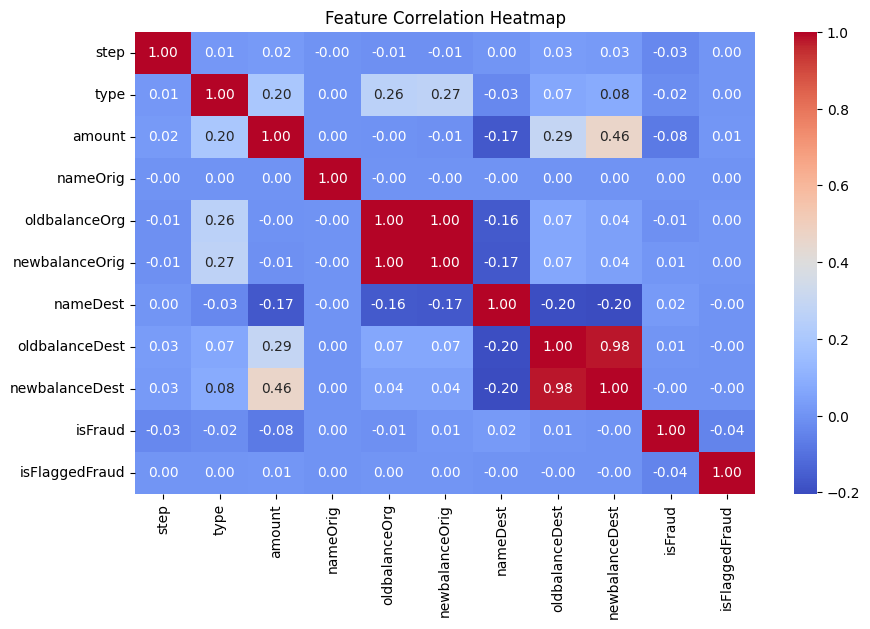

In [32]:
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_cols)
from sklearn.preprocessing import LabelEncoder

# Encode all non-numeric columns
for col in non_numeric_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df_numeric = df.select_dtypes(include=[np.number])
correlation = df.corr()  # Use df_numeric if dropping non-numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()
